# **Predicción del Movimiento de Nubes para la Optimización de Plantas Fotovoltaicas en Colombia**

## 1) Descarga de imágenes

A continuación se muestra el código empleado para la descarga de imágenes correspondientes a la banda 13 para el periodo de tiempo comprendido entre el 01/01/2024 y el 31/12/2024. Ingresar al siguiente repositorio de github: https://github.com/alwos19/monografia_esp_cd

## 2) Obtención del dataset

A partir de las imagenes obtenidas se realiza la construcción de una dataset en el que las columnas correspondan a cada hora del día y las filas a cada día del año, dentro de cada celda se ubica la imagen correspondiente con una tamaño de 920X920, el valor de cada pixel corresponde a los valores de radiancia para le día y la hora correspondientes.

In [1]:
# Librerias de utilidad
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Ruta donde están almacenados los archivos .npy
ruta_archivos = "./rad13_sin_outliers"  # Cambia esto por la ruta real
archivos = os.listdir(ruta_archivos)

# Función para procesar un archivo individual (sin guardar la matriz radiancia)
def procesar_archivo(archivo):
    if archivo.endswith(".npy") and archivo.startswith("RadFC_"):
        try:
            nombre = archivo.replace("RadFC_", "").replace("_Rad13.npy", "")
            fecha_str = nombre[:12]  # 'YYYYMMDDHHMM'
            fecha_datetime = datetime.strptime(fecha_str, "%Y%m%d%H%M")
            fecha = fecha_datetime
            mes = fecha_datetime.month
            hora = fecha_datetime.strftime("%H:%M")
            hora_num = fecha_datetime.hour
            ruta_completa = os.path.join(ruta_archivos, archivo)
            radiancia = np.load(ruta_completa).astype(np.float32)
            if radiancia.shape == (920, 920):
                return {
                    "fecha": fecha,
                    "mes": mes,
                    "hora": hora,
                    "hora_num": hora_num,
                    "archivo": archivo,
                    "media": np.mean(radiancia),
                    "varianza": np.var(radiancia),
                    "desviacion_estandar": np.std(radiancia),
                    "minimo": np.min(radiancia),
                    "maximo": np.max(radiancia),
                    "mediana": np.median(radiancia),
                }
            else:
                print(f"Dimensiones incorrectas en: {archivo}")
        except Exception as e:
            print(f"Error procesando {archivo}: {e}")
    return None

# Procesar todos los archivos y guardar los resultados válidos
datos = []
for archivo in archivos:
    resultado = procesar_archivo(archivo)
    if resultado is not None:
        datos.append(resultado)

# Crear el DataFrame y establecer 'fecha' como índice
df_imagenes = pd.DataFrame(datos)
df_imagenes["fecha"] = pd.to_datetime(df_imagenes["fecha"])
df_imagenes = df_imagenes.set_index("fecha")
df_imagenes.sort_index(inplace=True)

# Mostrar las primeras filas para verificar
print(df_imagenes.head())

                     mes   hora  hora_num                         archivo  \
fecha                                                                       
2024-01-01 00:00:00    1  00:00         0  RadFC_20240101000020_Rad13.npy   
2024-01-01 01:00:00    1  01:00         1  RadFC_20240101010020_Rad13.npy   
2024-01-01 02:00:00    1  02:00         2  RadFC_20240101020020_Rad13.npy   
2024-01-01 03:00:00    1  03:00         3  RadFC_20240101030020_Rad13.npy   
2024-01-01 04:00:00    1  04:00         4  RadFC_20240101040020_Rad13.npy   

                         media    varianza  desviacion_estandar     minimo  \
fecha                                                                        
2024-01-01 00:00:00  78.386208  481.097656            21.933939  19.436731   
2024-01-01 01:00:00  77.299774  488.951080            22.112238  18.705069   
2024-01-01 02:00:00  76.273544  483.943481            21.998716  15.961332   
2024-01-01 03:00:00  76.179817  447.778625            21.160780  14.68

In [3]:
df_imagenes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8744 entries, 2024-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mes                  8744 non-null   int64  
 1   hora                 8744 non-null   object 
 2   hora_num             8744 non-null   int64  
 3   archivo              8744 non-null   object 
 4   media                8744 non-null   float32
 5   varianza             8744 non-null   float32
 6   desviacion_estandar  8744 non-null   float32
 7   minimo               8744 non-null   float32
 8   maximo               8744 non-null   float32
 9   mediana              8744 non-null   float32
dtypes: float32(6), int64(2), object(2)
memory usage: 546.5+ KB


## 3) Analisis Exploratorio 

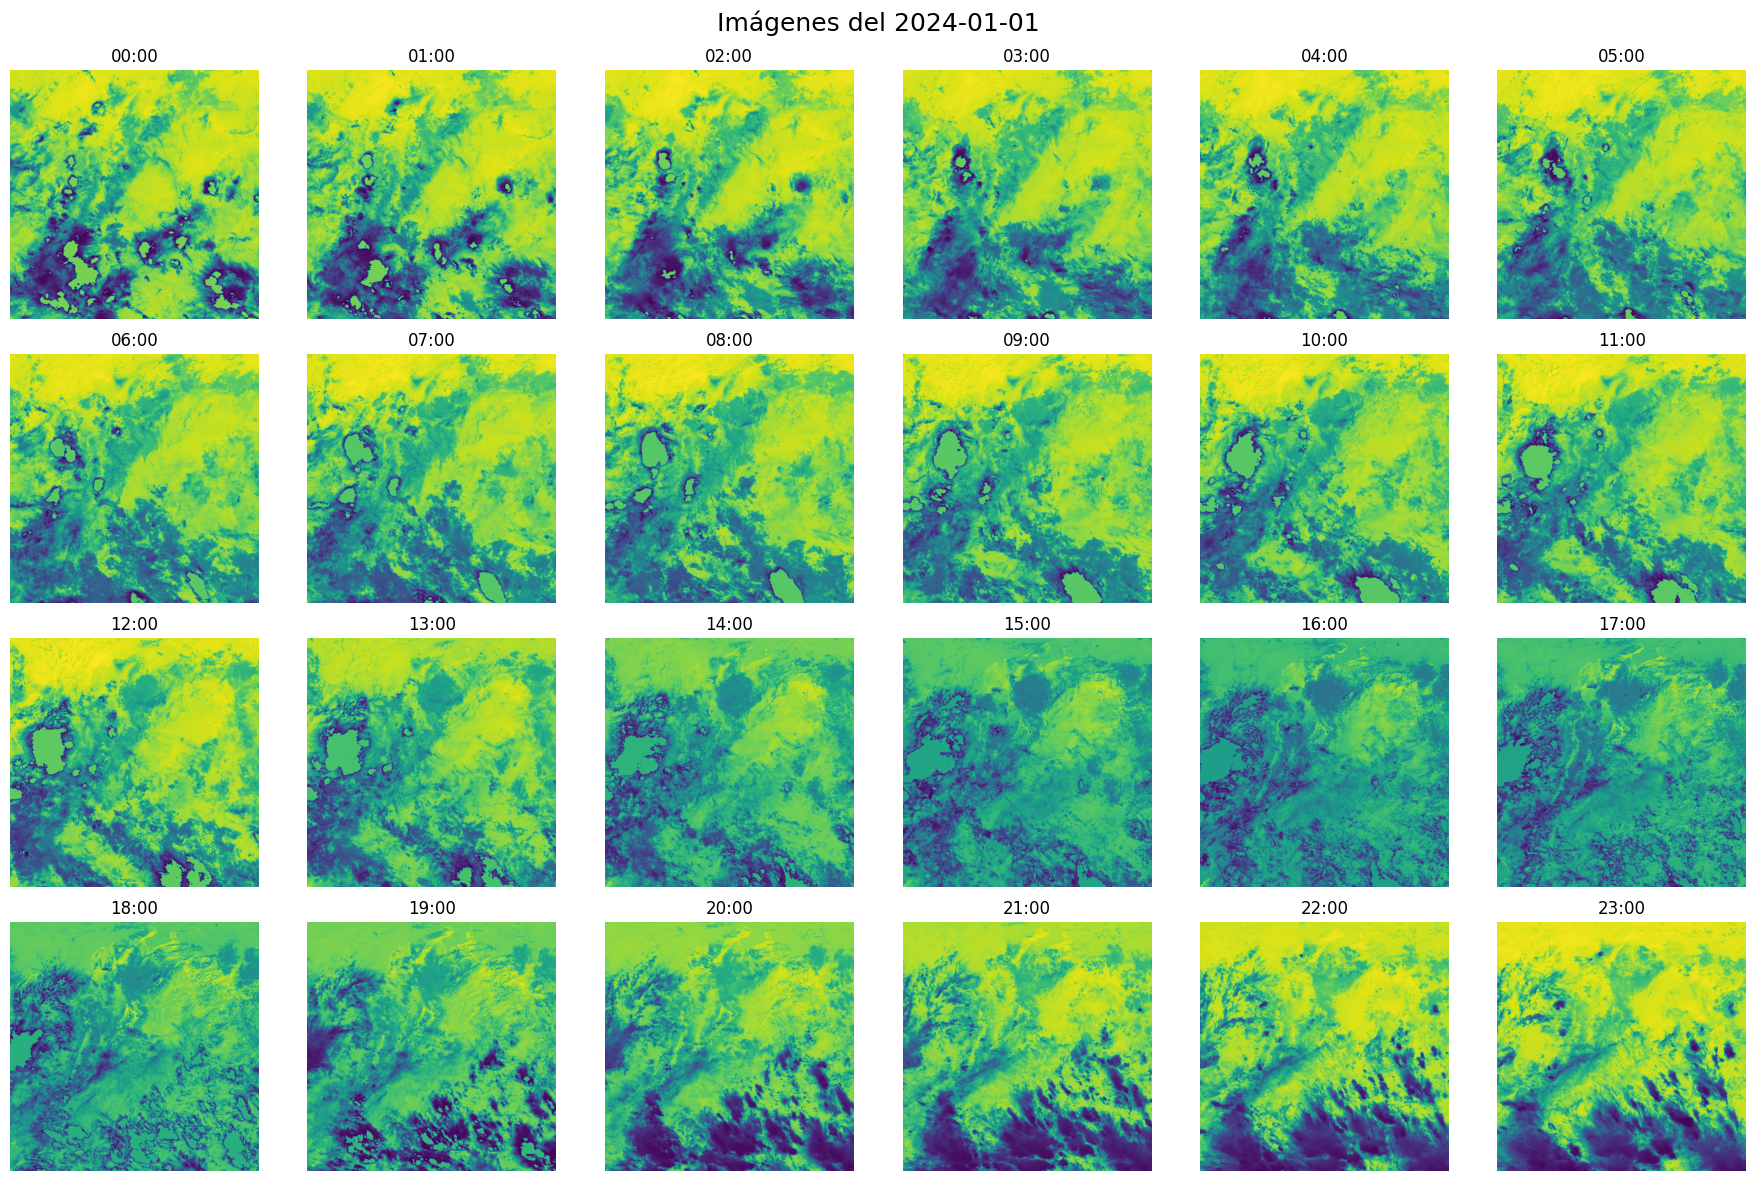

In [4]:
# Día que quieres visualizar (formato: 'YYYY-MM-DD')
dia_especifico = "2024-01-01"

# Filtrar el DataFrame por el día
df_dia = df_imagenes[df_imagenes.index.date == pd.to_datetime(dia_especifico).date()]

# Asegurar que estén ordenadas por hora
df_dia = df_dia.sort_index()

# Verificar si hay imágenes para ese día
if df_dia.empty:
    print(f"No se encontraron imágenes para el día {dia_especifico}")
else:
    # Crear figura
    fig, axes = plt.subplots(4, 6, figsize=(18, 12))
    axes = axes.flatten()

    for i, (fecha, fila) in enumerate(df_dia.iterrows()):
        if i >= 24:
            break  # Mostrar máximo 24 imágenes
        ruta_completa = os.path.join(ruta_archivos, fila["archivo"])
        radiancia = np.load(ruta_completa)

        ax = axes[i]
        im = ax.imshow(radiancia, cmap='viridis')
        ax.set_title(fecha.strftime('%H:%M'))
        ax.axis('off')

    # Ocultar ejes sobrantes si hay menos de 24
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    fig.suptitle(f'Imágenes del {dia_especifico}', fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

Visualización del minimo de radianza

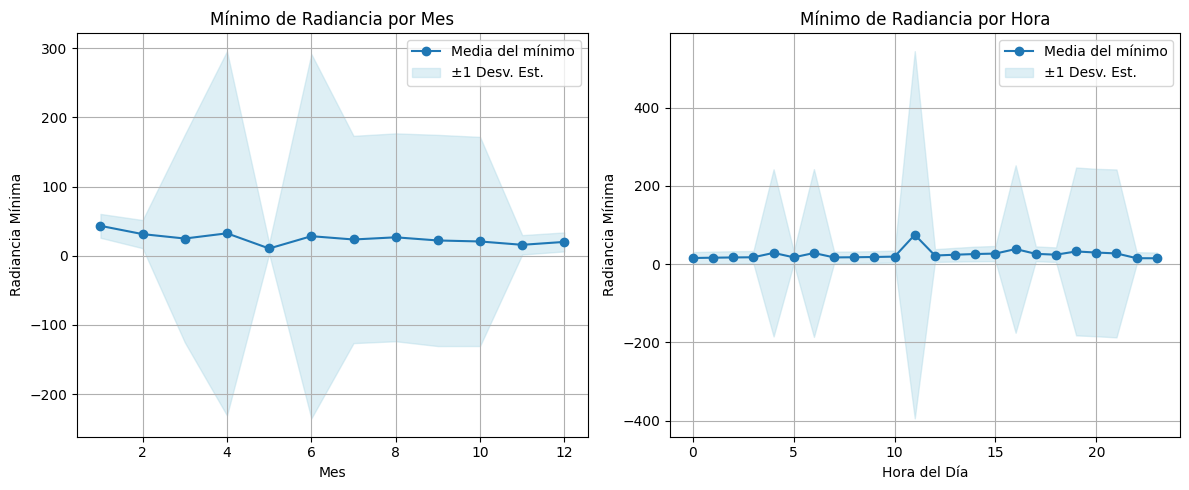

In [5]:
# ----- RESUMEN POR MES -----
resumen_min_mes = df_imagenes.groupby('mes')['minimo'].agg(['mean', 'std']).reset_index()
resumen_min_mes.rename(columns={'mean': 'media', 'std': 'desviacion_estandar'}, inplace=True)

# ----- RESUMEN POR HORA -----
resumen_min_hora = df_imagenes.groupby('hora_num')['minimo'].agg(['mean', 'std']).reset_index()
resumen_min_hora.rename(columns={'mean': 'media', 'std': 'desviacion_estandar'}, inplace=True)

# ----- GRAFICAR -----
plt.figure(figsize=(12, 5))

# Por mes
plt.subplot(1, 2, 1)
plt.plot(resumen_min_mes['mes'], resumen_min_mes['media'], marker='o', label='Media del mínimo')
plt.fill_between(resumen_min_mes['mes'],
                 resumen_min_mes['media'] - resumen_min_mes['desviacion_estandar'],
                 resumen_min_mes['media'] + resumen_min_mes['desviacion_estandar'],
                 color='lightblue', alpha=0.4, label='±1 Desv. Est.')
plt.title('Mínimo de Radiancia por Mes')
plt.xlabel('Mes')
plt.ylabel('Radiancia Mínima')
plt.legend()
plt.grid(True)

# Por hora
plt.subplot(1, 2, 2)
plt.plot(resumen_min_hora['hora_num'], resumen_min_hora['media'], marker='o', label='Media del mínimo')
plt.fill_between(resumen_min_hora['hora_num'],
                 resumen_min_hora['media'] - resumen_min_hora['desviacion_estandar'],
                 resumen_min_hora['media'] + resumen_min_hora['desviacion_estandar'],
                 color='lightblue', alpha=0.4, label='±1 Desv. Est.')
plt.title('Mínimo de Radiancia por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Radiancia Mínima')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Visualización por maximo de radiancia

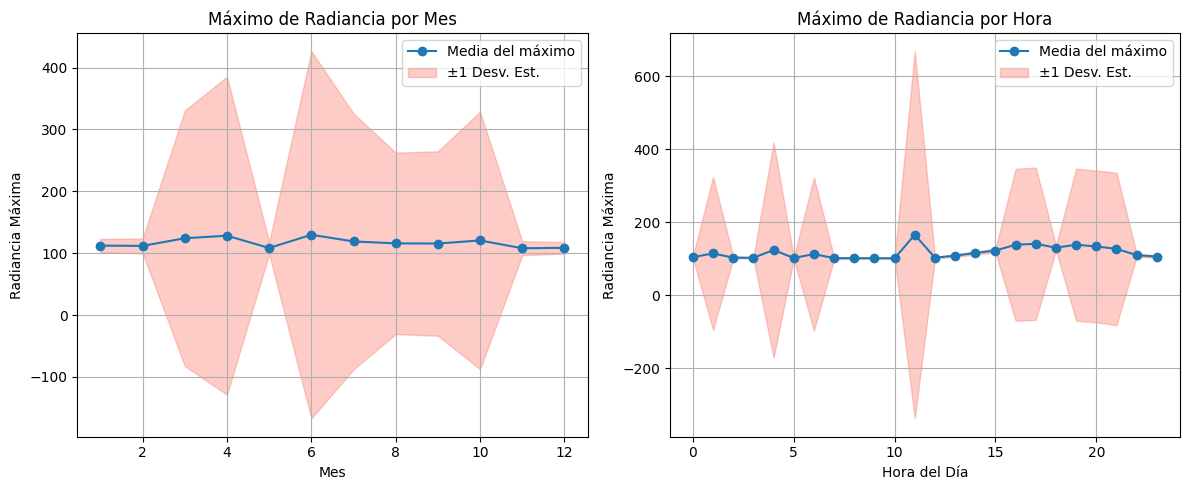

In [6]:
# ----- RESUMEN POR MES -----
resumen_max_mes = df_imagenes.groupby('mes')['maximo'].agg(['mean', 'std']).reset_index()
resumen_max_mes.rename(columns={'mean': 'media', 'std': 'desviacion_estandar'}, inplace=True)

# ----- RESUMEN POR HORA -----
resumen_max_hora = df_imagenes.groupby('hora_num')['maximo'].agg(['mean', 'std']).reset_index()
resumen_max_hora.rename(columns={'mean': 'media', 'std': 'desviacion_estandar'}, inplace=True)

# ----- GRAFICAR -----
plt.figure(figsize=(12, 5))

# Por mes
plt.subplot(1, 2, 1)
plt.plot(resumen_max_mes['mes'], resumen_max_mes['media'], marker='o', label='Media del máximo')
plt.fill_between(resumen_max_mes['mes'],
                 resumen_max_mes['media'] - resumen_max_mes['desviacion_estandar'],
                 resumen_max_mes['media'] + resumen_max_mes['desviacion_estandar'],
                 color='salmon', alpha=0.4, label='±1 Desv. Est.')
plt.title('Máximo de Radiancia por Mes')
plt.xlabel('Mes')
plt.ylabel('Radiancia Máxima')
plt.legend()
plt.grid(True)

# Por hora
plt.subplot(1, 2, 2)
plt.plot(resumen_max_hora['hora_num'], resumen_max_hora['media'], marker='o', label='Media del máximo')
plt.fill_between(resumen_max_hora['hora_num'],
                 resumen_max_hora['media'] - resumen_max_hora['desviacion_estandar'],
                 resumen_max_hora['media'] + resumen_max_hora['desviacion_estandar'],
                 color='salmon', alpha=0.4, label='±1 Desv. Est.')
plt.title('Máximo de Radiancia por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Radiancia Máxima')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Vusualización por promedio de radianza

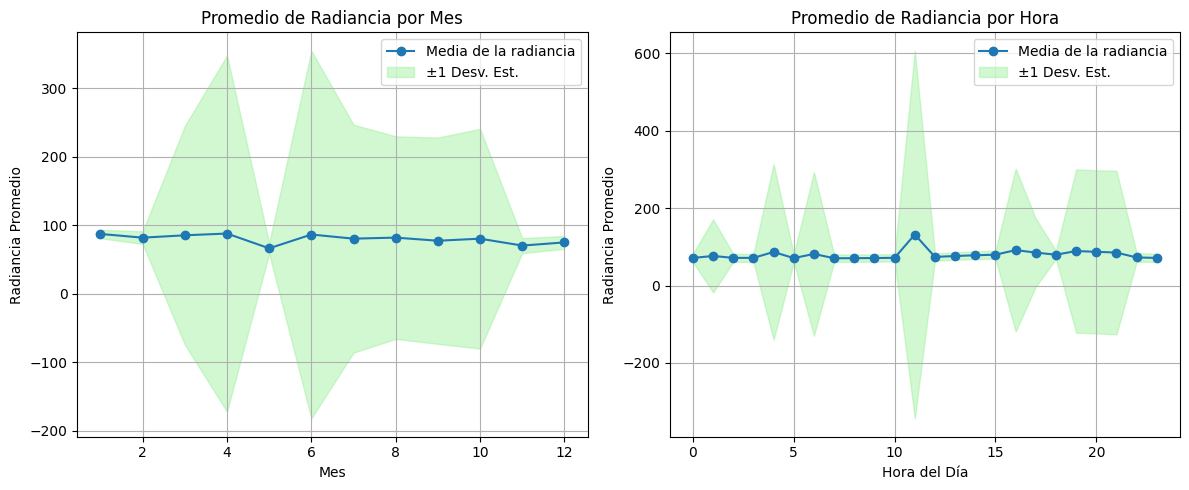

In [7]:
# ----- RESUMEN POR MES -----
resumen_media_mes = df_imagenes.groupby('mes')['media'].agg(['mean', 'std']).reset_index()
resumen_media_mes.rename(columns={'mean': 'media', 'std': 'desviacion_estandar'}, inplace=True)

# ----- RESUMEN POR HORA -----
resumen_media_hora = df_imagenes.groupby('hora_num')['media'].agg(['mean', 'std']).reset_index()
resumen_media_hora.rename(columns={'mean': 'media', 'std': 'desviacion_estandar'}, inplace=True)

# ----- GRAFICAR -----
plt.figure(figsize=(12, 5))

# Por mes
plt.subplot(1, 2, 1)
plt.plot(resumen_media_mes['mes'], resumen_media_mes['media'], marker='o', label='Media de la radiancia')
plt.fill_between(resumen_media_mes['mes'],
                 resumen_media_mes['media'] - resumen_media_mes['desviacion_estandar'],
                 resumen_media_mes['media'] + resumen_media_mes['desviacion_estandar'],
                 color='lightgreen', alpha=0.4, label='±1 Desv. Est.')
plt.title('Promedio de Radiancia por Mes')
plt.xlabel('Mes')
plt.ylabel('Radiancia Promedio')
plt.legend()
plt.grid(True)

# Por hora
plt.subplot(1, 2, 2)
plt.plot(resumen_media_hora['hora_num'], resumen_media_hora['media'], marker='o', label='Media de la radiancia')
plt.fill_between(resumen_media_hora['hora_num'],
                 resumen_media_hora['media'] - resumen_media_hora['desviacion_estandar'],
                 resumen_media_hora['media'] + resumen_media_hora['desviacion_estandar'],
                 color='lightgreen', alpha=0.4, label='±1 Desv. Est.')
plt.title('Promedio de Radiancia por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Radiancia Promedio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Mapa de calor

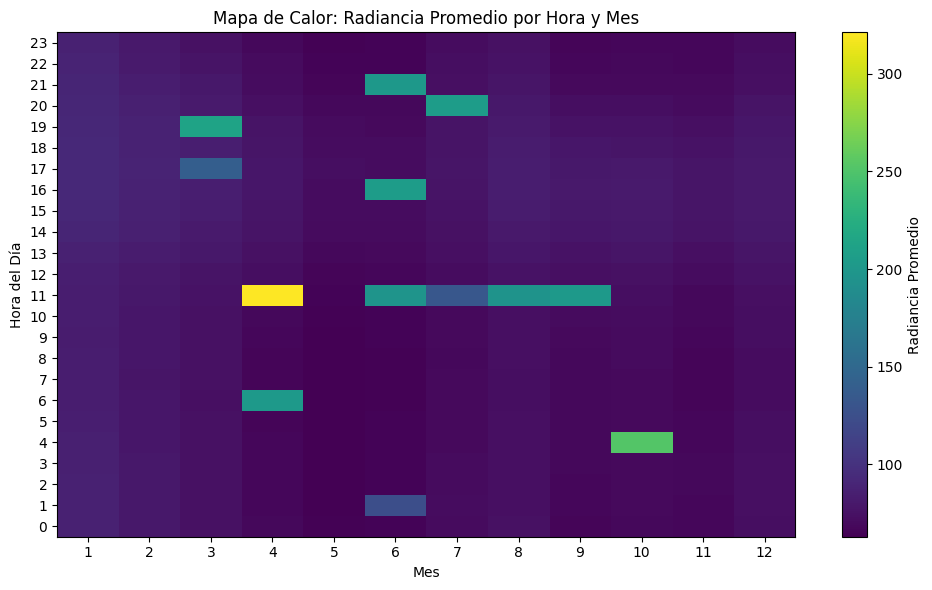

In [11]:
# Crear tabla pivote (hora vs mes)
pivot_heatmap = df_imagenes.pivot_table(
    values='media',
    index='hora_num',
    columns='mes',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(10, 6))
plt.imshow(pivot_heatmap, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Radiancia Promedio')
plt.title('Mapa de Calor: Radiancia Promedio por Hora y Mes')
plt.xlabel('Mes')
plt.ylabel('Hora del Día')
plt.xticks(ticks=np.arange(0, 12), labels=[str(m) for m in range(1, 13)])
plt.yticks(ticks=np.arange(0, 24), labels=[str(h) for h in range(0, 24)])
plt.tight_layout()
plt.show()

Linea temporal de la radiancia promedio

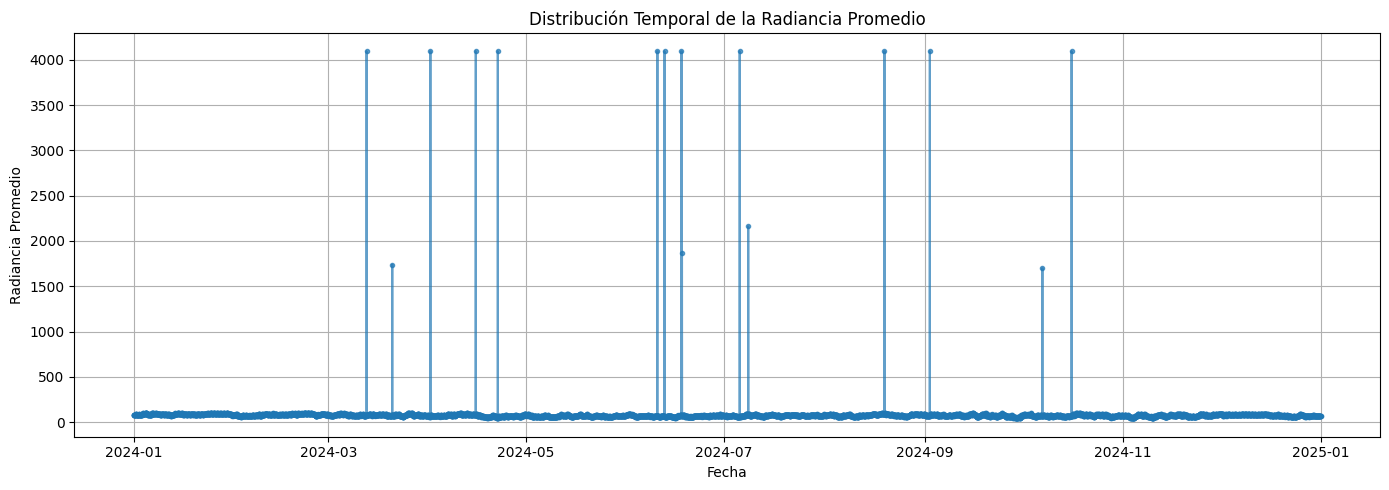

In [12]:
# Línea temporal de radiancia promedio
plt.figure(figsize=(14, 5))
plt.plot(df_imagenes.index, df_imagenes['media'], marker='.', linestyle='-', alpha=0.7)
plt.title('Distribución Temporal de la Radiancia Promedio')
plt.xlabel('Fecha')
plt.ylabel('Radiancia Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

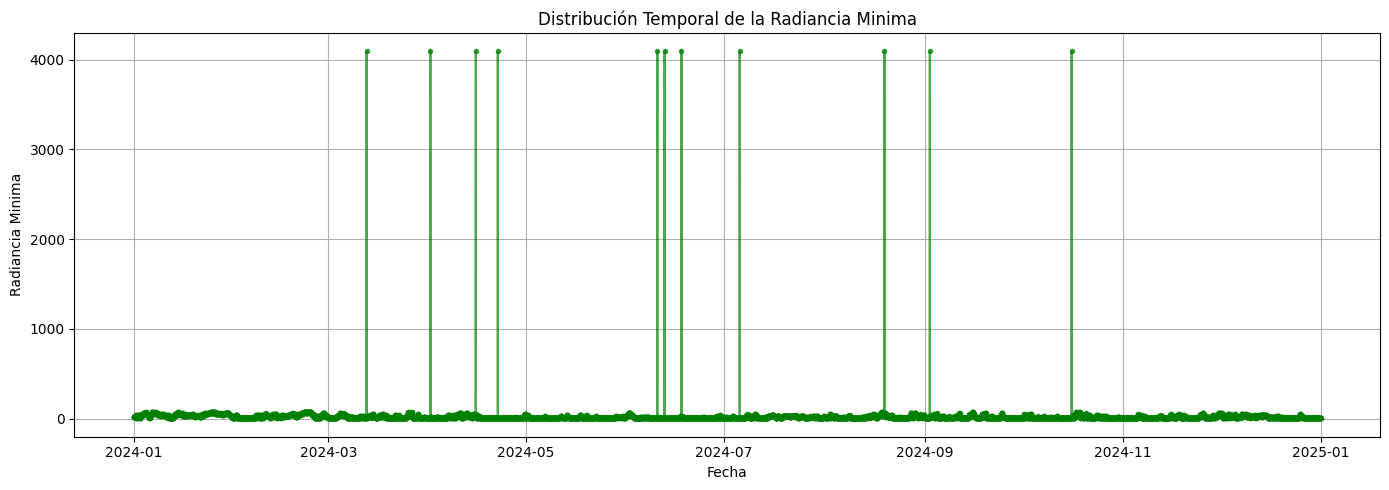

In [15]:
# Línea temporal de radiancia minima
plt.figure(figsize=(14, 5))
plt.plot(df_imagenes.index, df_imagenes['minimo'], marker='.', linestyle='-', alpha=0.7, color='green')
plt.title('Distribución Temporal de la Radiancia Minima')
plt.xlabel('Fecha')
plt.ylabel('Radiancia Minima')
plt.grid(True)
plt.tight_layout()
plt.show()

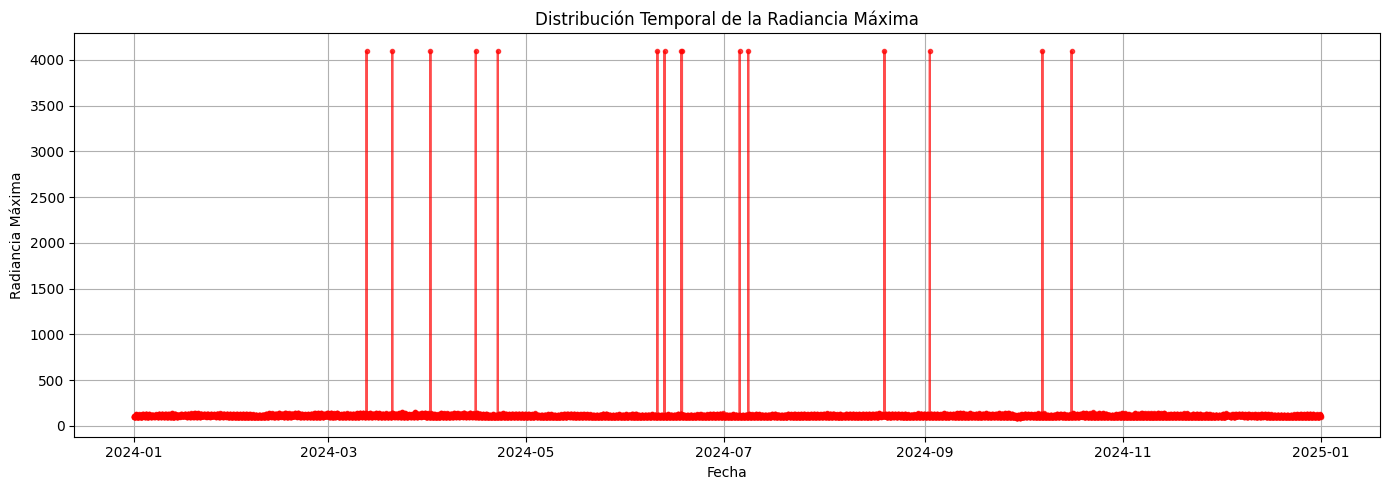

In [16]:
# Línea temporal de radiancia Máxima
plt.figure(figsize=(14, 5))
plt.plot(df_imagenes.index, df_imagenes['maximo'], marker='.', linestyle='-', alpha=0.7, color='red')
plt.title('Distribución Temporal de la Radiancia Máxima')
plt.xlabel('Fecha')
plt.ylabel('Radiancia Máxima')
plt.grid(True)
plt.tight_layout()
plt.show()

Identificación de Outliers

Analisis de serie de tiempo

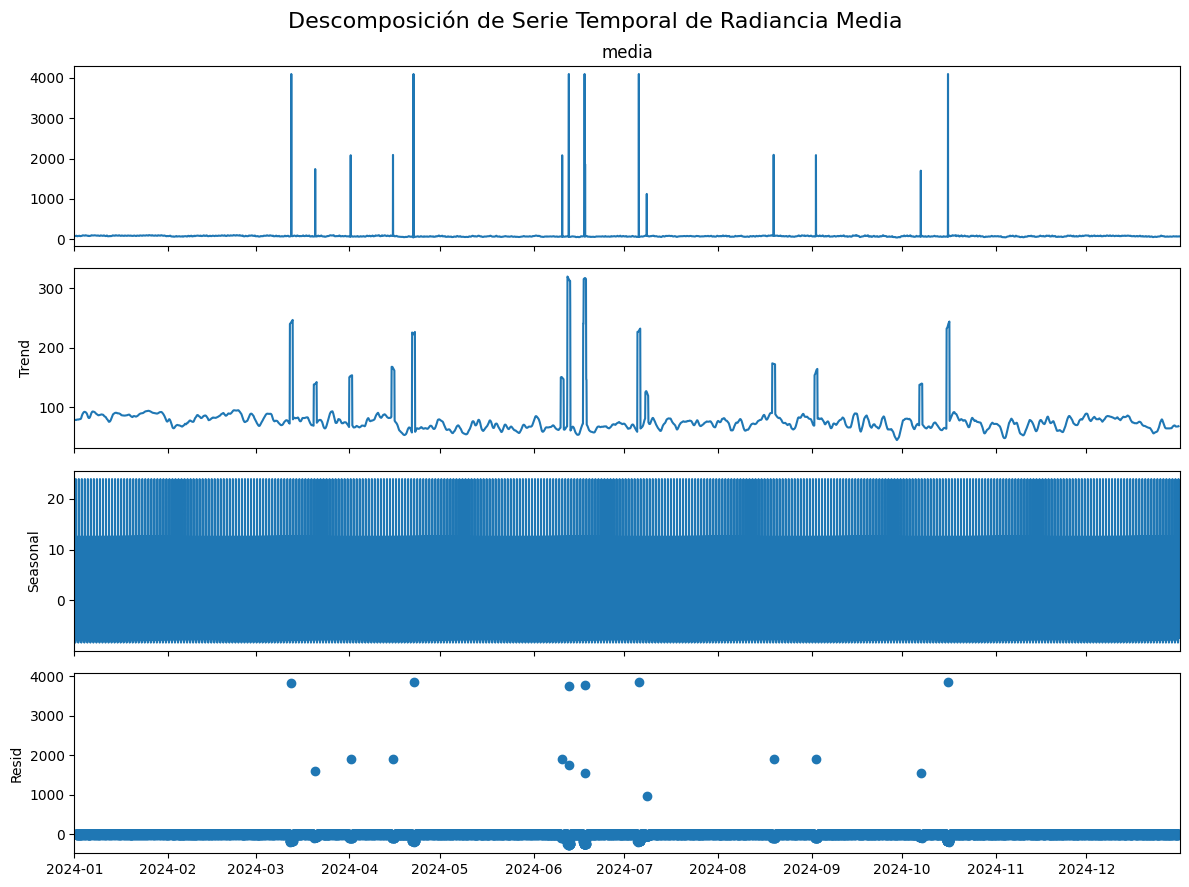

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Asegurar que la serie tenga frecuencia uniforme
# Resampleamos a una frecuencia horaria (puedes ajustar según tus datos)
serie_media = df_imagenes['media'].resample('h').mean()

# Rellenamos valores faltantes con interpolación (si hay huecos)
serie_media = serie_media.interpolate()

# Descomposición: modelo aditivo (puedes probar 'multiplicative' si tiene más sentido)
descomposicion = seasonal_decompose(serie_media, model='additive', period=24)  # 24 = diario si es por hora

# Graficar componentes
fig = descomposicion.plot()
fig.set_size_inches(12, 9)
fig.suptitle('Descomposición de Serie Temporal de Radiancia Media', fontsize=16)
plt.tight_layout()
plt.show()

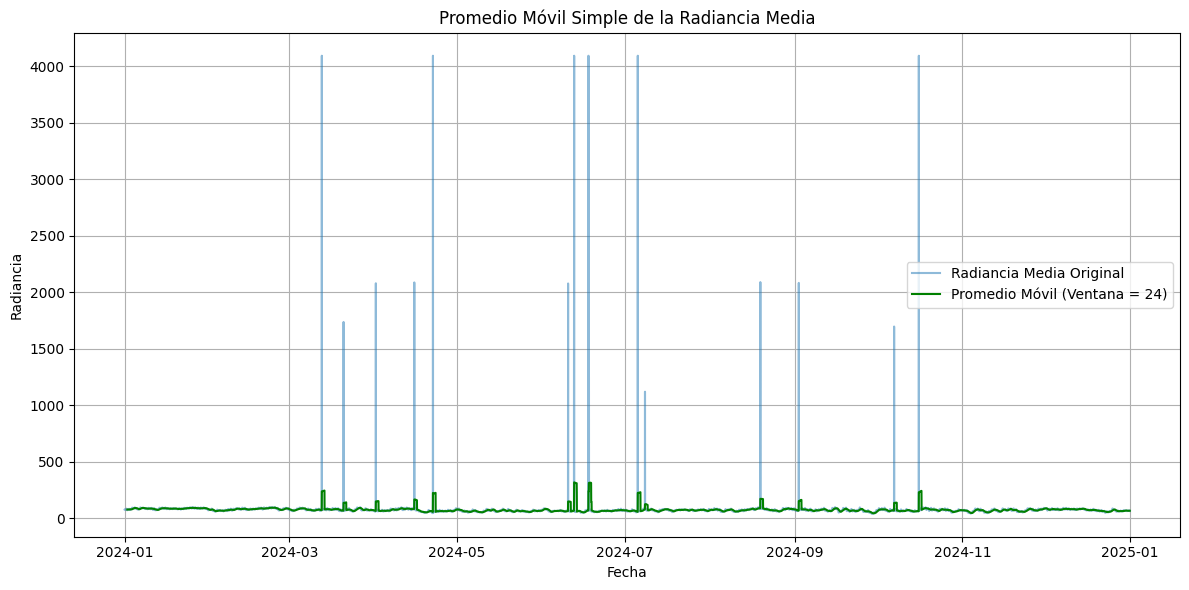

In [18]:
# 1. Resamplear la serie temporal a datos por hora
serie_media = df_imagenes['media'].resample('h').mean()

# 2. Rellenar valores faltantes si es necesario
serie_media = serie_media.interpolate()

# 3. Aplicar promedio móvil simple con una ventana de 24 (1 día si los datos son horarios)
ventana = 24
media_movil = serie_media.rolling(window=ventana).mean()

# 4. Graficar
plt.figure(figsize=(12, 6))
plt.plot(serie_media, label='Radiancia Media Original', alpha=0.5)
plt.plot(media_movil, label=f'Promedio Móvil (Ventana = {ventana})', color='green')
plt.title('Promedio Móvil Simple de la Radiancia Media')
plt.xlabel('Fecha')
plt.ylabel('Radiancia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Trasformación de los datos:escalado

In [19]:
# Ruta donde están almacenados los archivos .npy
ruta_archivos = "./rad13_sin_outliers"  # Cambia esto por la ruta real
archivos = os.listdir(ruta_archivos)

# Función para escalar los datos entre 0 y 1
def escalar_min_max(matriz):
    min_val = np.min(matriz)
    max_val = np.max(matriz)
    if max_val > min_val:
        return (matriz - min_val) / (max_val - min_val)
    else:
        return np.zeros_like(matriz)  # Si todos los valores son iguales

# Función para procesar un archivo individual y escalar la matriz
def procesar_archivo(archivo):
    if archivo.endswith(".npy") and archivo.startswith("RadFC_"):
        try:
            nombre = archivo.replace("RadFC_", "").replace("_Rad13.npy", "")
            fecha_str = nombre[:12]  # 'YYYYMMDDHHMM'
            fecha_datetime = datetime.strptime(fecha_str, "%Y%m%d%H%M")
            fecha = fecha_datetime
            mes = fecha_datetime.month
            hora = fecha_datetime.strftime("%H:%M")
            hora_num = fecha_datetime.hour
            ruta_completa = os.path.join(ruta_archivos, archivo)
            radiancia = np.load(ruta_completa).astype(np.float32)

            if radiancia.shape == (920, 920):
                # Escalado entre 0 y 1
                radiancia_escalada = escalar_min_max(radiancia)

                # Puedes guardar la matriz escalada si lo deseas:
                # np.save(os.path.join("./rad13_escalado", archivo), radiancia_escalada)

                return {
                    "fecha": fecha,
                    "mes": mes,
                    "hora": hora,
                    "hora_num": hora_num,
                    "archivo": archivo,
                    "media": np.mean(radiancia_escalada),
                    "varianza": np.var(radiancia_escalada),
                    "desviacion_estandar": np.std(radiancia_escalada),
                    "minimo": np.min(radiancia_escalada),
                    "maximo": np.max(radiancia_escalada),
                    "mediana": np.median(radiancia_escalada),
                }
            else:
                print(f"Dimensiones incorrectas en: {archivo}")
        except Exception as e:
            print(f"Error procesando {archivo}: {e}")
    return None

# Procesar todos los archivos y guardar los resultados válidos
datos = []
for archivo in archivos:
    resultado = procesar_archivo(archivo)
    if resultado is not None:
        datos.append(resultado)

# Crear el DataFrame y establecer 'fecha' como índice
df_imagenes = pd.DataFrame(datos)
df_imagenes["fecha"] = pd.to_datetime(df_imagenes["fecha"])
df_imagenes = df_imagenes.set_index("fecha")
df_imagenes.sort_index(inplace=True)

# Mostrar las primeras filas para verificar
print(df_imagenes.head())

                     mes   hora  hora_num                         archivo  \
fecha                                                                       
2024-01-01 00:00:00    1  00:00         0  RadFC_20240101000020_Rad13.npy   
2024-01-01 01:00:00    1  01:00         1  RadFC_20240101010020_Rad13.npy   
2024-01-01 02:00:00    1  02:00         2  RadFC_20240101020020_Rad13.npy   
2024-01-01 03:00:00    1  03:00         3  RadFC_20240101030020_Rad13.npy   
2024-01-01 04:00:00    1  04:00         4  RadFC_20240101040020_Rad13.npy   

                        media  varianza  desviacion_estandar  minimo  maximo  \
fecha                                                                          
2024-01-01 00:00:00  0.695312  0.066932             0.258712     0.0     1.0   
2024-01-01 01:00:00  0.692621  0.068319             0.261379     0.0     1.0   
2024-01-01 02:00:00  0.694893  0.064242             0.253460     0.0     1.0   
2024-01-01 03:00:00  0.689671  0.056313             0.237305

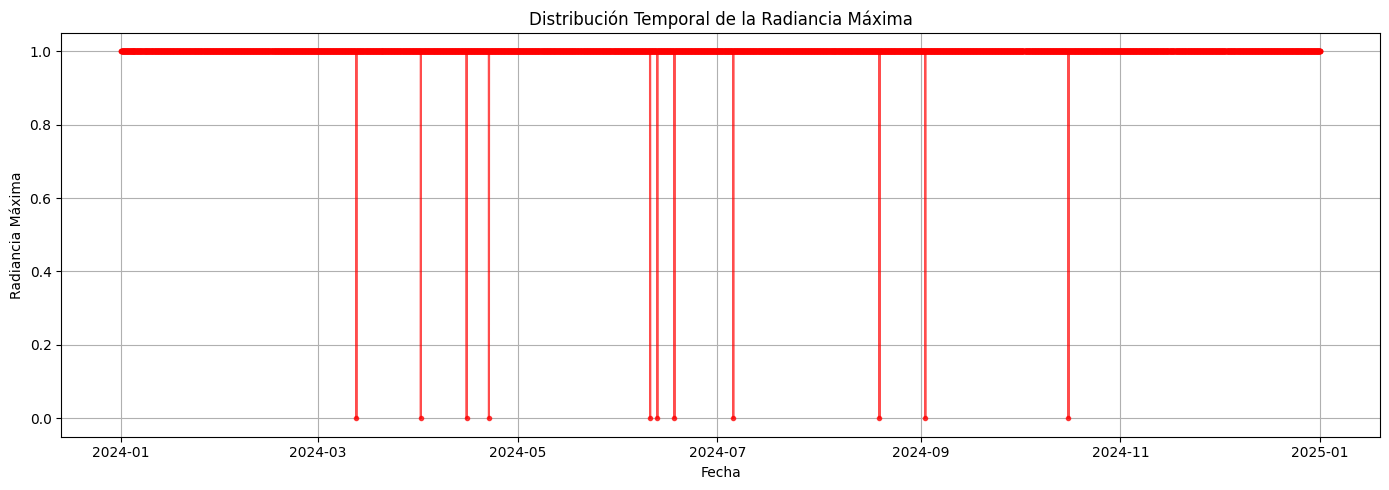

In [21]:
# Línea temporal de radiancia Máxima
plt.figure(figsize=(14, 5))
plt.plot(df_imagenes.index, df_imagenes['maximo'], marker='.', linestyle='-', alpha=0.7, color='red')
plt.title('Distribución Temporal de la Radiancia Máxima')
plt.xlabel('Fecha')
plt.ylabel('Radiancia Máxima')
plt.grid(True)
plt.tight_layout()
plt.show()

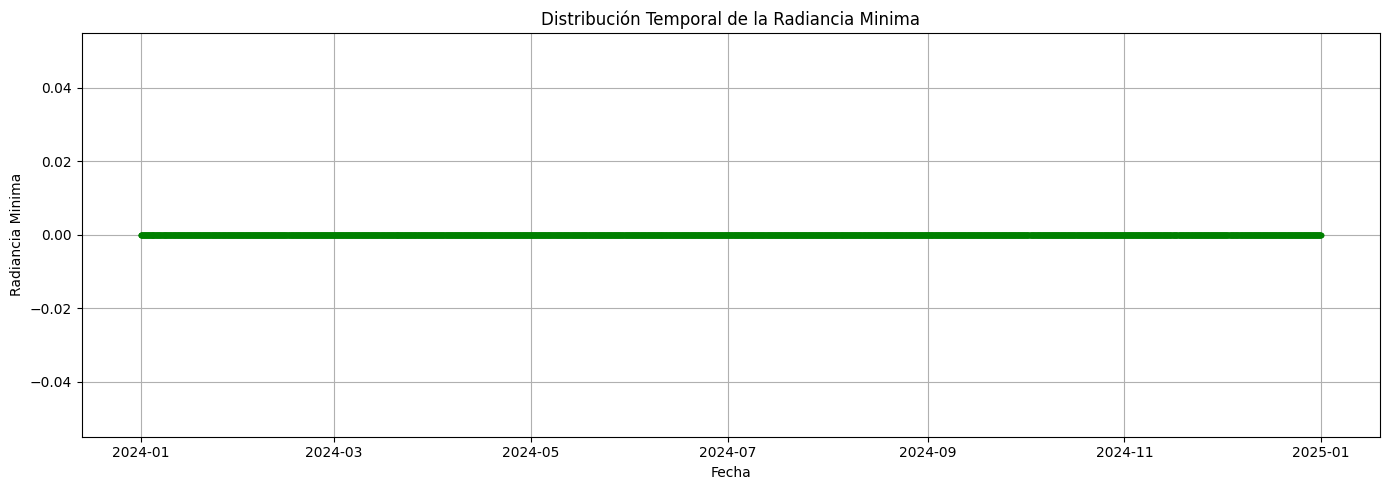

In [22]:
# Línea temporal de radiancia minima
plt.figure(figsize=(14, 5))
plt.plot(df_imagenes.index, df_imagenes['minimo'], marker='.', linestyle='-', alpha=0.7, color='green')
plt.title('Distribución Temporal de la Radiancia Minima')
plt.xlabel('Fecha')
plt.ylabel('Radiancia Minima')
plt.grid(True)
plt.tight_layout()
plt.show()

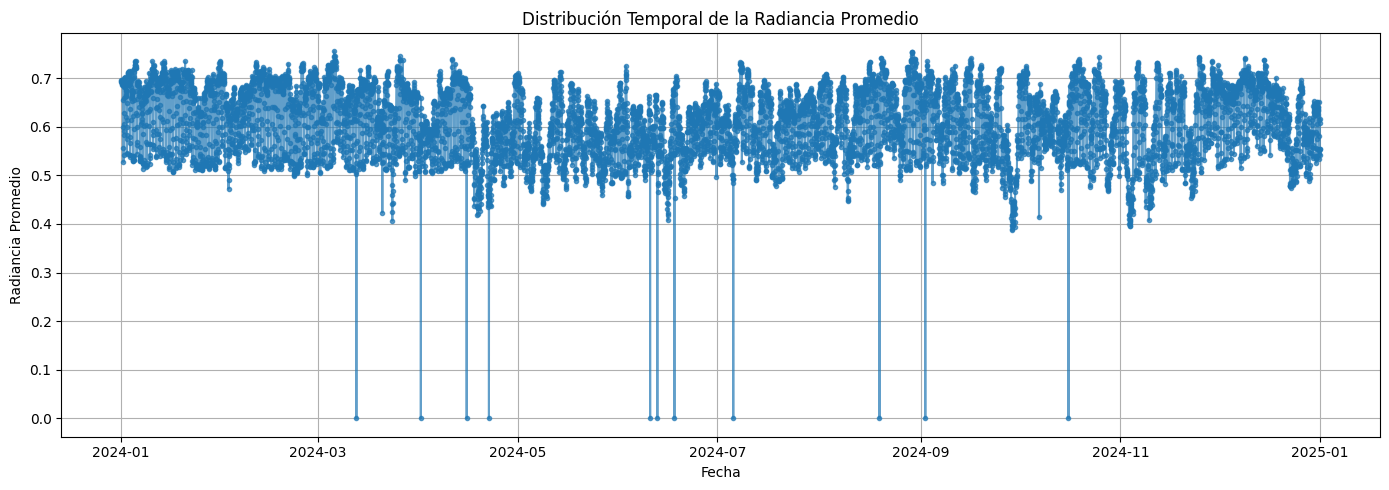

In [23]:
# Línea temporal de radiancia promedio
plt.figure(figsize=(14, 5))
plt.plot(df_imagenes.index, df_imagenes['media'], marker='.', linestyle='-', alpha=0.7)
plt.title('Distribución Temporal de la Radiancia Promedio')
plt.xlabel('Fecha')
plt.ylabel('Radiancia Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

Eliminación de outliers

In [26]:
# Función modificada para eliminar los outliers reemplazándolos con NaN o la mediana
def eliminar_outliers_archivo(ruta, reemplazo='nan'):  # reemplazo puede ser 'nan' o 'mediana'
    matriz = np.load(ruta)
    flat = matriz.flatten()

    # Cálculo de IQR y límites
    q1 = np.percentile(flat, 25)
    q3 = np.percentile(flat, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Máscara de outliers
    outliers_mask = (flat < lower) | (flat > upper)

    # Reemplazo de valores
    if reemplazo == 'nan':
        flat[outliers_mask] = np.nan
    elif reemplazo == 'mediana':
        mediana = np.median(flat[~outliers_mask])
        flat[outliers_mask] = mediana

    # Reshape a matriz original
    matriz_sin_outliers = flat.reshape((920, 920))
    return matriz_sin_outliers

In [27]:
# Crear carpeta para guardar archivos sin outliers
carpeta_salida = "./rad13_sin_outliers"
os.makedirs(carpeta_salida, exist_ok=True)

# Procesar y guardar los archivos sin outliers
for archivo in df_imagenes['archivo']:
    ruta_original = os.path.join(ruta_archivos, archivo)
    matriz_limpia = eliminar_outliers_archivo(ruta_original, reemplazo='mediana')  # o 'nan'
    ruta_salida = os.path.join(carpeta_salida, archivo)
    np.save(ruta_salida, matriz_limpia)